Imports

In [1]:
# standard library imports
import pathlib
import sqlite3

# third-party library imports
import matplotlib.pyplot as plt
import pandas as pd

# options
pd.set_option('display.max_columns', None)

Define a `pathlib.Path` object pointing to the `northwinds.db` sqlite file and check whether the defined path exists.

In [2]:
db_path = pathlib.Path('../data/northwind/northwind.db')
db_path.exists()

True

Taking a look at the *Entity Relationship Diagram* for the database (see https://github.com/nkfreeman/OM_421_Fall_2023/blob/main/data/northwind/Northwind_ERD.png) shows that there should be a table named `Orders` in the database. The following code block creates a connection to the database using a *context manager* (the **with** statement) and uses this connection to read everything in the `Orders` table via `pandas`, which I gave the alias `pd` when importing.

In [3]:
with sqlite3.Connection(db_path) as conn:
    orders = pd.read_sql('SELECT * from Orders', conn)

A quick check of the `type` shows that the created `orders` object is a `DataFrame`.

In [4]:
type(orders)

pandas.core.frame.DataFrame

The `orders` `DataFrame` object has an *attribute* named `shape` that displays the dimensions of the object. The object has 830 rows and 14 columns.

In [5]:
orders.shape

(830, 14)

The object has an `info` method, which provides details on the various columns including the column names, the number of *non-null* values in each column, and the data type for each column. Note that the returned data also shows a **#** value for each column, which starts at zero and goes to 13. This is because python, like many other programming languages, is *zero-indexed*.

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderID         830 non-null    int64  
 1   CustomerID      830 non-null    object 
 2   EmployeeID      830 non-null    int64  
 3   OrderDate       830 non-null    object 
 4   RequiredDate    830 non-null    object 
 5   ShippedDate     809 non-null    object 
 6   ShipVia         830 non-null    int64  
 7   Freight         830 non-null    float64
 8   ShipName        830 non-null    object 
 9   ShipAddress     830 non-null    object 
 10  ShipCity        830 non-null    object 
 11  ShipRegion      830 non-null    object 
 12  ShipPostalCode  811 non-null    object 
 13  ShipCountry     830 non-null    object 
dtypes: float64(1), int64(3), object(10)
memory usage: 90.9+ KB


We can use the `head` method, with no additional arguments, to print the first five rows of the `orders` object.

In [7]:
orders.head()

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2016-07-04,2016-08-01,2016-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l-Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2016-07-05,2016-08-16,2016-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2016-07-08,2016-08-05,2016-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2016-07-08,2016-08-05,2016-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2016-07-09,2016-08-06,2016-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


Providing an *integer* argument to the `head` method allows us to print a user-specified number of rows.

In [8]:
orders.head(10)

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2016-07-04,2016-08-01,2016-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l-Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2016-07-05,2016-08-16,2016-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2016-07-08,2016-08-05,2016-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2016-07-08,2016-08-05,2016-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2016-07-09,2016-08-06,2016-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium
5,10253,HANAR,3,2016-07-10,2016-07-24,2016-07-16,2,58.17,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
6,10254,CHOPS,5,2016-07-11,2016-08-08,2016-07-23,2,22.98,Chop-suey Chinese,Hauptstr. 31,Bern,Western Europe,3012,Switzerland
7,10255,RICSU,9,2016-07-12,2016-08-09,2016-07-15,3,148.33,Richter Supermarkt,Starenweg 5,Genève,Western Europe,1204,Switzerland
8,10256,WELLI,3,2016-07-15,2016-08-12,2016-07-17,2,13.97,Wellington Importadora,"Rua do Mercado, 12",Resende,South America,08737-363,Brazil
9,10257,HILAA,4,2016-07-16,2016-08-13,2016-07-22,3,81.91,HILARION-Abastos,Carrera 22 con Ave. Carlos Soublette #8-35,San Cristóbal,South America,5022,Venezuela


You can access specific values in a `pandas` `DataFrame` using the `loc` accessor and providing row and column labels, very similar to the way cells are referenced in Excel.

In [9]:
orders.loc[4, 'ShipName']

'Suprêmes délices'

You can also pass a `list` as the row or column to access multiple rows or columns. The following code block shows how we can access the values in more than one column for a single row.

In [10]:
orders.loc[4, ['OrderID', 'ShipName']]

OrderID                10252
ShipName    Suprêmes délices
Name: 4, dtype: object

The following code block shows how we can access the values in more than one column for more than one row.

In [11]:
orders.loc[[1, 3], ['OrderID', 'ShipName']]

,OrderID,ShipName
1,10249,Toms Spezialitäten
3,10251,Victuailles en stock


We can grab an entire column as follows. Notice that it looks different than the output we saw earlier when we ran the `head` method.

In [12]:
orders['ShipName']

0       Vins et alcools Chevalier
1              Toms Spezialitäten
2                   Hanari Carnes
3            Victuailles en stock
4                Suprêmes délices
                  ...            
825     Pericles Comidas clásicas
826                 Simons bistro
827            Richter Supermarkt
828                      Bon app-
829    Rattlesnake Canyon Grocery
Name: ShipName, Length: 830, dtype: object

If we check the `type`, we see it is a `pandas` `Series` instead of a `DataFrame`.

In [13]:
type(orders['ShipName'])

pandas.core.series.Series

The following code block shows that we can save a copy as a variable for later reference.

In [14]:
temp = orders['ShipName'].copy()
temp

0       Vins et alcools Chevalier
1              Toms Spezialitäten
2                   Hanari Carnes
3            Victuailles en stock
4                Suprêmes délices
                  ...            
825     Pericles Comidas clásicas
826                 Simons bistro
827            Richter Supermarkt
828                      Bon app-
829    Rattlesnake Canyon Grocery
Name: ShipName, Length: 830, dtype: object

You can also access items from the series using the `loc` accessor, you just don't have column labels.

In [15]:
temp.loc[4]

'Suprêmes délices'

Note that we get the same result just by *chaining* the `loc` accessor on the command we used to get the `Series` originally.

In [16]:
orders['ShipName'].loc[4]

'Suprêmes délices'

The following code block shows that we can use a *boolean* comparison to get a *Series* of **True/False** values that match a particular expression.

In [17]:
orders['ShipName'] == 'Simons bistro'

0      False
1      False
2      False
3      False
4      False
       ...  
825    False
826     True
827    False
828    False
829    False
Name: ShipName, Length: 830, dtype: bool

Such `boolean` `Series` are a common way of filtering a `DataFrame` that are sometimes referred to as a `mask`. To demonstrate, the following code block saves the mask.

In [18]:
mask = orders['ShipName'] == 'Simons bistro'
mask

0      False
1      False
2      False
3      False
4      False
       ...  
825    False
826     True
827    False
828    False
829    False
Name: ShipName, Length: 830, dtype: bool

The following code block shows how we can use the created mask to filter the `orders` object.

In [19]:
orders[mask]

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
93,10341,SIMOB,7,2016-10-29,2016-11-26,2016-11-05,3,26.78,Simons bistro,Vinbæltet 34,Kobenhavn,Northern Europe,1734,Denmark
169,10417,SIMOB,4,2017-01-16,2017-02-13,2017-01-28,3,70.29,Simons bistro,Vinbæltet 34,Kobenhavn,Northern Europe,1734,Denmark
308,10556,SIMOB,2,2017-06-03,2017-07-15,2017-06-13,1,9.80,Simons bistro,Vinbæltet 34,Kobenhavn,Northern Europe,1734,Denmark
394,10642,SIMOB,7,2017-08-22,2017-09-19,2017-09-05,3,41.89,Simons bistro,Vinbæltet 34,Kobenhavn,Northern Europe,1734,Denmark
421,10669,SIMOB,2,2017-09-15,2017-10-13,2017-09-22,1,24.39,Simons bistro,Vinbæltet 34,Kobenhavn,Northern Europe,1734,Denmark
554,10802,SIMOB,4,2017-12-29,2018-01-26,2018-01-02,2,257.26,Simons bistro,Vinbæltet 34,Kobenhavn,Northern Europe,1734,Denmark
826,11074,SIMOB,7,2018-05-06,2018-06-03,None,2,18.44,Simons bistro,Vinbæltet 34,Kobenhavn,Northern Europe,1734,Denmark


If the column names contain no spaces, we can also use `.` (dot) methods to select columns.

In [20]:
orders.ShipRegion

0       Western Europe
1       Western Europe
2        South America
3       Western Europe
4       Western Europe
            ...       
825    Central America
826    Northern Europe
827     Western Europe
828     Western Europe
829      North America
Name: ShipRegion, Length: 830, dtype: object

We can continue chaining attributes or methods to perform additional operations.

In [21]:
orders.ShipRegion.unique()

array(['Western Europe', 'South America', 'Central America',
       'North America', 'Northern Europe', 'Scandinavia',
       'Southern Europe', 'British Isles', 'Eastern Europe'], dtype=object)

The following code block combines a mask with the `groupby` functionality of `pandas` `DataFrames` to show how we can get a timeseries of the sales in the `Western Europe` region by `ShippedDate`.

In [22]:
ship_region_mask = orders.ShipRegion == 'Western Europe'
ship_region_data = orders[ship_region_mask]

ship_region_time_series = ship_region_data.groupby(
    'ShippedDate'
)['OrderID'].nunique()

ship_region_time_series

ShippedDate
2016-07-10    1
2016-07-11    1
2016-07-15    2
2016-07-16    1
2016-07-23    2
             ..
2018-04-27    1
2018-04-28    1
2018-04-29    2
2018-04-30    1
2018-05-06    1
Name: OrderID, Length: 205, dtype: int64

Calling the `plot` method on the resulting `Series` generates a simple plot of the data. Note that the semicolon at the end is not necessary, but is inlcuded simply to prevent Jupyter from writing some output to the screen.

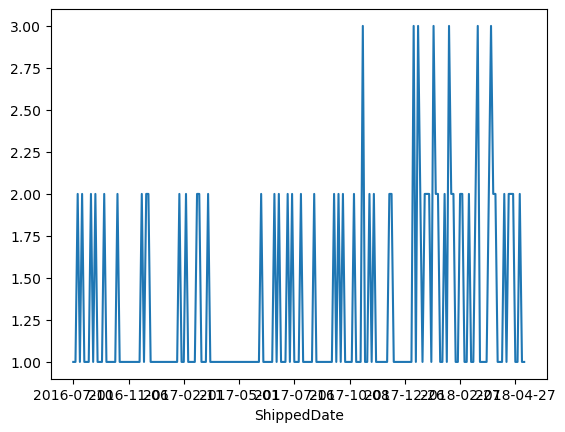

In [23]:
ship_region_time_series.plot();

Although the plot is technically correct, it is not very presentable. One major thing that looks odd is the horizontal axis labels. Recall when we looked at the output of the `info` method that the data type for this column was specified as an `object`. This is a generic type in `pandas` that can store pretty much anything. The following cell converts this column to a `datetime` type.

In [24]:
orders.ShippedDate = pd.to_datetime(orders.ShippedDate)

Note that if we call the `info` method again that the type has changed appropriately.

In [25]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OrderID         830 non-null    int64         
 1   CustomerID      830 non-null    object        
 2   EmployeeID      830 non-null    int64         
 3   OrderDate       830 non-null    object        
 4   RequiredDate    830 non-null    object        
 5   ShippedDate     809 non-null    datetime64[ns]
 6   ShipVia         830 non-null    int64         
 7   Freight         830 non-null    float64       
 8   ShipName        830 non-null    object        
 9   ShipAddress     830 non-null    object        
 10  ShipCity        830 non-null    object        
 11  ShipRegion      830 non-null    object        
 12  ShipPostalCode  811 non-null    object        
 13  ShipCountry     830 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)
memo

If we generate the plot again, we see that `pandas` has formatted the horizontal axis better now that it knows the appropriate type.

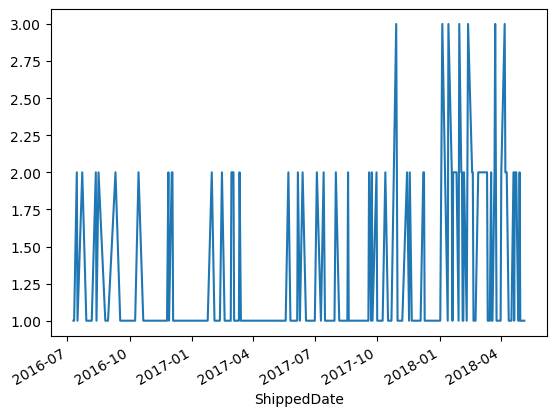

In [26]:
ship_region_mask = orders.ShipRegion == 'Western Europe'
ship_region_data = orders[ship_region_mask]

ship_region_time_series = ship_region_data.groupby(
    'ShippedDate'
)['OrderID'].nunique()

ship_region_time_series.plot();

Although the previous plot is better, it still is hard to see whether or not the sales are trending. The following code block repeats the analysis with a rolling mean. **Do you think this looks correct? Please justify why you do or don't.**

<Axes: xlabel='ShippedDate'>

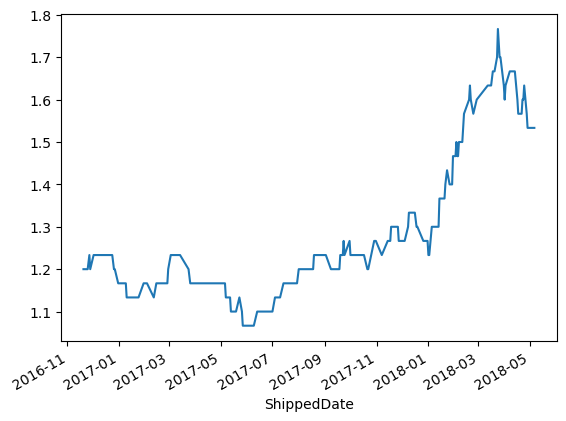

In [27]:
ship_region_mask = orders.ShipRegion == 'Western Europe'
ship_region_data = orders[ship_region_mask]
ship_region_time_series = ship_region_data.groupby(
    'ShippedDate'
)['OrderID'].nunique()
ship_region_time_series.rolling(30).mean().plot()

Here is a different view. Does this seem more plausible.

<Axes: xlabel='ShippedDate'>

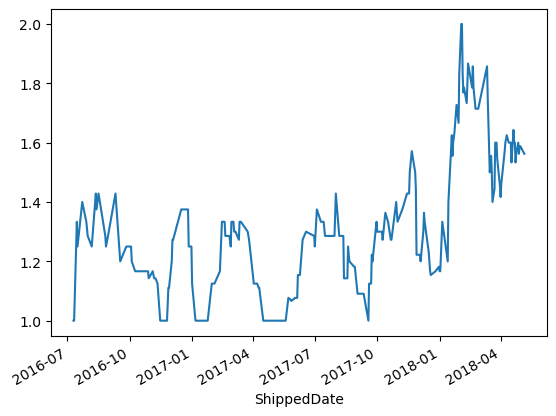

In [28]:
import datetime as dt

ship_region_time_series.rolling(dt.timedelta(days=30)).mean().plot()

The following code block simply moves the region to a variable and adds a title.

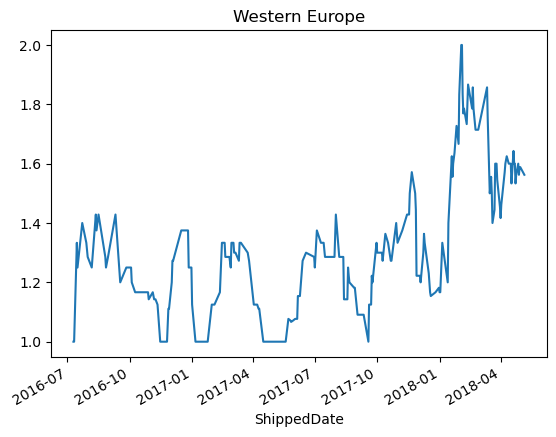

In [29]:
target_region = 'Western Europe'

ship_region_mask = orders.ShipRegion == target_region
ship_region_data = orders[ship_region_mask]
ship_region_time_series = ship_region_data.groupby(
    'ShippedDate'
)['OrderID'].nunique()

ship_region_time_series.rolling(dt.timedelta(days=30)).mean().plot(title=target_region);

The following code block loops through all regions to generate a plot for each. The problem is that all of the plots are in one figure.

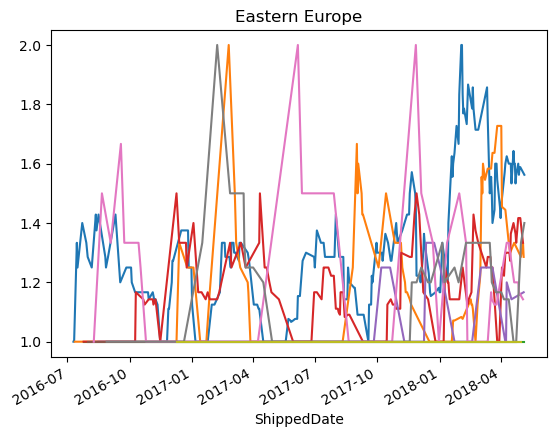

In [30]:
for target_region in orders.ShipRegion.unique():
    ship_region_mask = orders.ShipRegion == target_region
    ship_region_data = orders[ship_region_mask]
    ship_region_time_series = ship_region_data.groupby(
        'ShippedDate'
    )['OrderID'].nunique()

    ship_region_time_series.rolling(dt.timedelta(days=30)).mean().plot(title=target_region);

The following code block uses `matplotlib` to create a plot for each region.

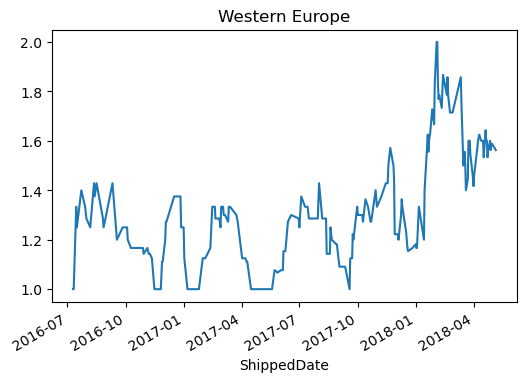

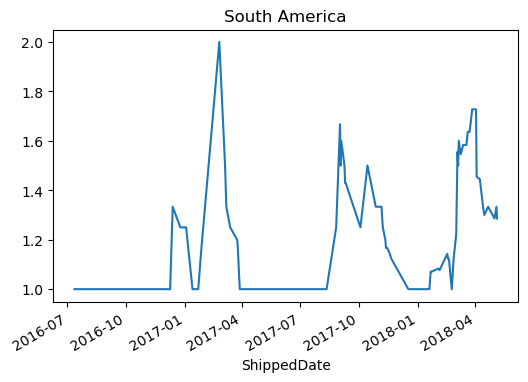

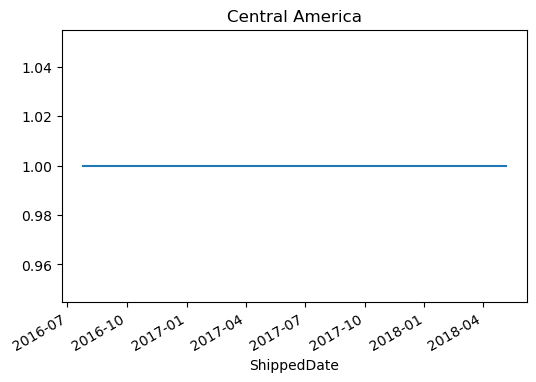

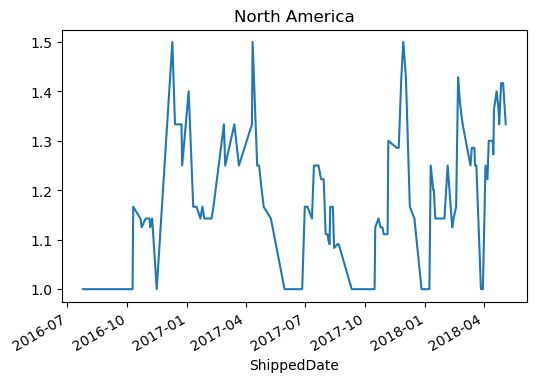

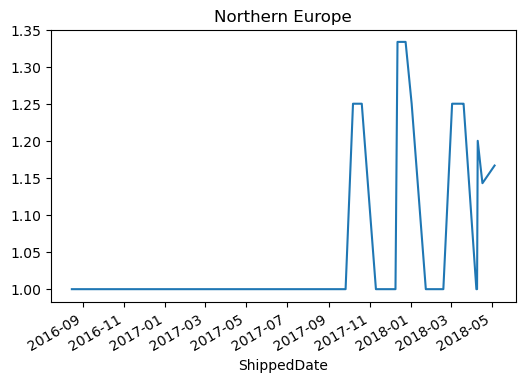

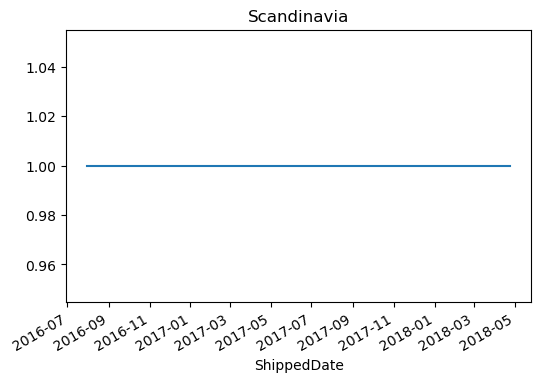

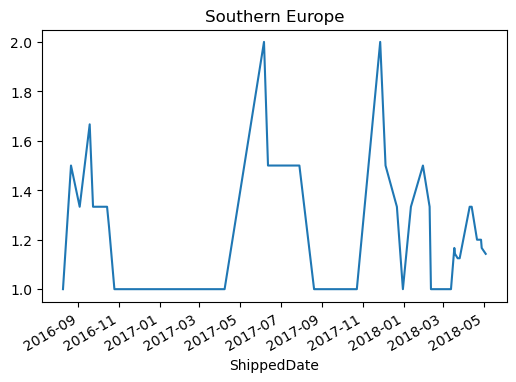

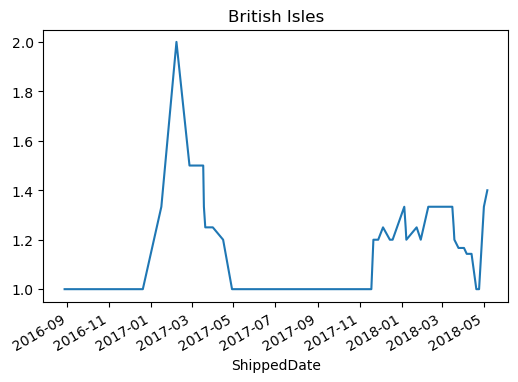

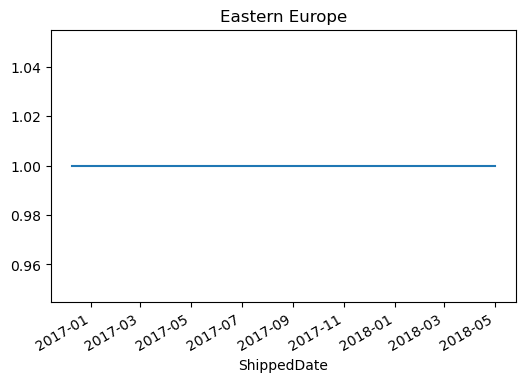

In [31]:
for target_region in orders.ShipRegion.unique():
    ship_region_mask = orders.ShipRegion == target_region
    ship_region_data = orders[ship_region_mask]
    ship_region_time_series = ship_region_data.groupby(
        'ShippedDate'
    )['OrderID'].nunique()
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    
    ship_region_time_series.rolling(dt.timedelta(days=30)).mean().plot(title=target_region, ax=ax);
    
    plt.show()

The following code block saves each of the plots in a created folder. Some of the uninformative *spines* of the plots are removed.

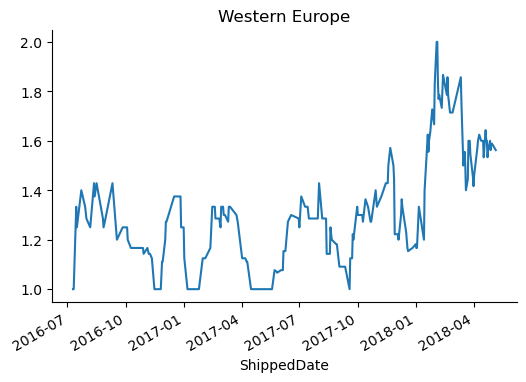

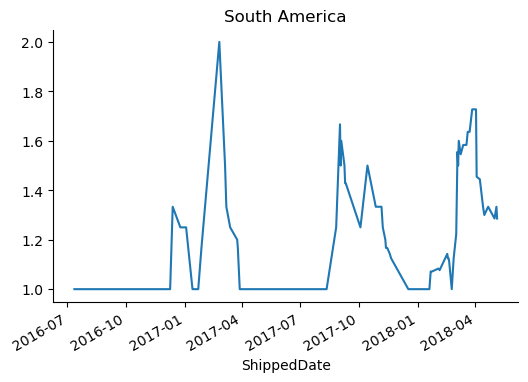

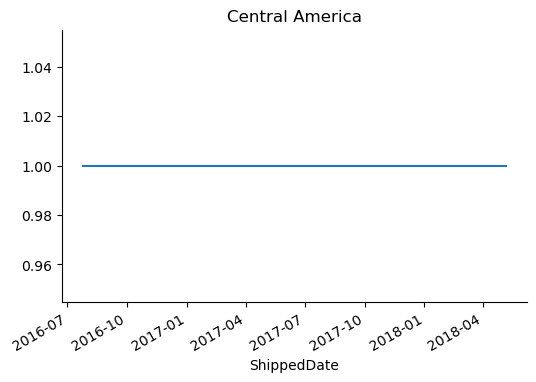

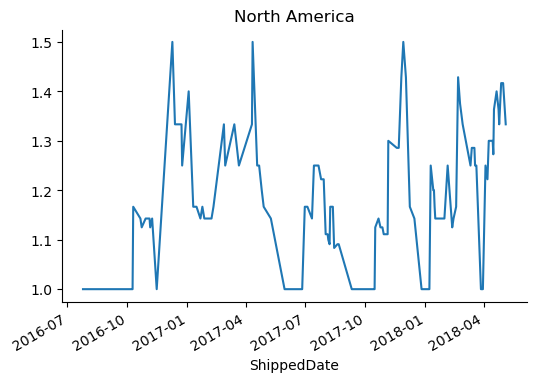

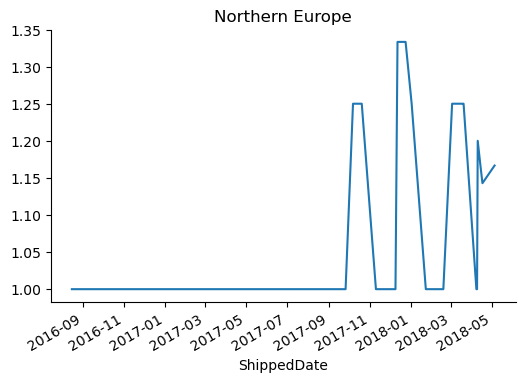

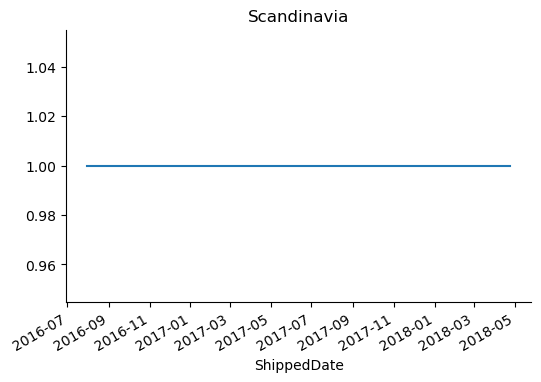

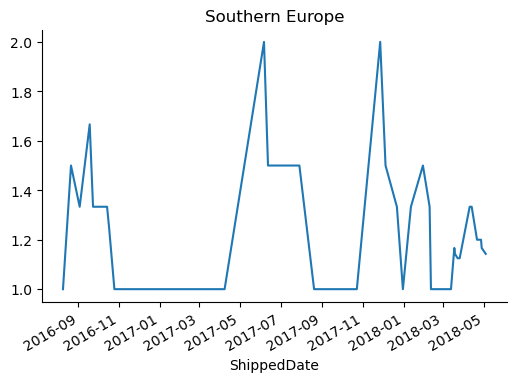

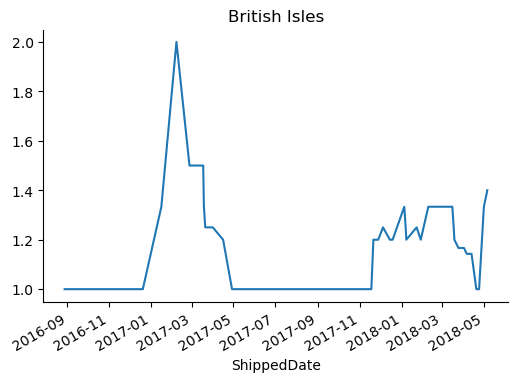

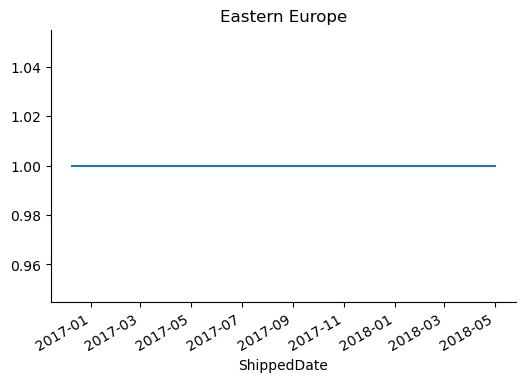

In [32]:
plots_directory = pathlib.Path('northwinds_plots')
plots_directory.mkdir(exist_ok=True)

for target_region in orders.ShipRegion.unique():
    ship_region_mask = orders.ShipRegion == target_region
    ship_region_data = orders[ship_region_mask]
    ship_region_time_series = ship_region_data.groupby(
        'ShippedDate'
    )['OrderID'].nunique()
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    
    ship_region_time_series.rolling(dt.timedelta(days=30)).mean().plot(title=target_region, ax=ax);
    ax.spines[['right', 'top']].set_visible(False)
    
    plot_filepath = pathlib.Path(plots_directory, f'{target_region}.png')
    plt.savefig(plot_filepath)
    plt.show()